
## Support Vector Machines 


For this project, I am using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [42]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### Exploratory Data Analysis

In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


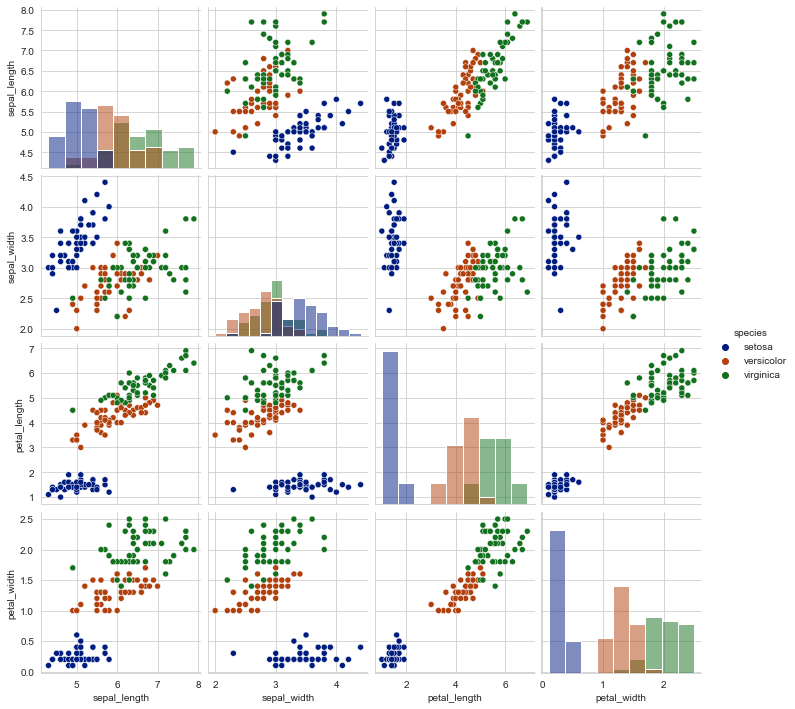

In [23]:
sns.set_style('whitegrid')
sns.pairplot(iris, hue = 'species', diag_kind='hist', palette='dark');

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

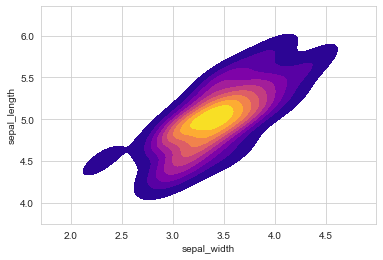

In [29]:
sns.kdeplot(data = iris[iris ['species'] == 'setosa'],x='sepal_width', y= 'sepal_length', fill=True, shade='dark', cmap='plasma');

## Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(['species'],axis=1), iris['species'], test_size=0.4, random_state=101) 

## Train a Model and Evaluation


In [36]:
model = SVC()

In [37]:
model.fit(X_train, y_train)

SVC()

In [38]:
prediction = model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, prediction))

[[19  0  0]
 [ 0 25  1]
 [ 0  0 15]]


In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.96      0.98        26
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



The model is pretty good! Let's see if we can tune the parameters to try to get even better (unlikely using GridSearch).

## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [44]:
param = {'C':[1,5,10,50,100],'gamma':[10,1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid=param, verbose = 3)

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [45]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=1, gamma=10;, score=0.889 total time=   0.0s
[CV 2/5] END .....................C=1, gamma=10;, score=0.833 total time=   0.0s
[CV 3/5] END .....................C=1, gamma=10;, score=0.778 total time=   0.0s
[CV 4/5] END .....................C=1, gamma=10;, score=0.778 total time=   0.0s
[CV 5/5] END .....................C=1, gamma=10;, score=0.889 total time=   0.0s
[CV 1/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.889 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.889 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.889 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.944 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001]},
             verbose=3)

** Create a GridSearchCV object and fit it to the training data.**

In [46]:
grid.best_estimator_

SVC(C=5, gamma=0.1)

In [47]:
grid_prediction = grid.predict(X_test)

In [48]:
print(confusion_matrix(y_test, grid_prediction))

[[19  0  0]
 [ 0 26  0]
 [ 0  0 15]]


In [49]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        26
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



While it was unlikely, but we could still manage to imporve the model and get a better results!